In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def createGraphs(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        ax.plot(xVec, yVecs[i], label=legendLabels[i])
    ax.legend()
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)

def createGraphs2(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None, yticks=None, colors=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
                    yVecs[i] is a list of experiments ran for one function call
                    yVecs[i,j] is a list of outputs of one experiment at xVec[j]
                    yVecs[i,j,k] is an instantiation of an experiment
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    if(colors == None):
        #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        # Generate quantile information
        lowQ = []
        highQ= []
        med  = []
        for j in range(len(xVec)):
            lowQ.append(np.quantile(yVecs[i][j], .25))
            highQ.append(np.quantile(yVecs[i][j], .75))
            med.append(np.quantile(yVecs[i][j], .5))
        ax.plot(xVec, lowQ, '--', color=colors[i])
        ax.plot(xVec, highQ, '--', color=colors[i])
        ax.plot(xVec, med, color=colors[i], label=legendLabels[i])
    ax.legend()
    if (yticks != None):
        plt.yticks(yticks)
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)
def createGraphs3(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None, yticks=None, colors=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
                    yVecs[i] is a list of experiments ran for one function call
                    yVecs[i,j] is a list of outputs of one experiment at xVec[j]
                    yVecs[i,j,k] is an instantiation of an experiment
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    if(colors == None):
        #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        # Generate quantile information
        lowQ = []
        highQ= []
        med  = []
        for j in range(len(xVec)):
            lowQ.append(np.quantile(yVecs[i][j], .25))
            highQ.append(np.quantile(yVecs[i][j], .75))
            med.append(np.quantile(yVecs[i][j], .5))
        ax.semilogy(xVec, lowQ, '--', color=colors[i])
        ax.semilogy(xVec, highQ, '--', color=colors[i])
        ax.semilogy(xVec, med, color=colors[i], label=legendLabels[i])
    ax.legend()
    if (yticks != None):
        plt.yticks(yticks)
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)

/tmp/ipykernel_28816/303359924.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_28816/303359924.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_28816/303359924.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_28816/303359924.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


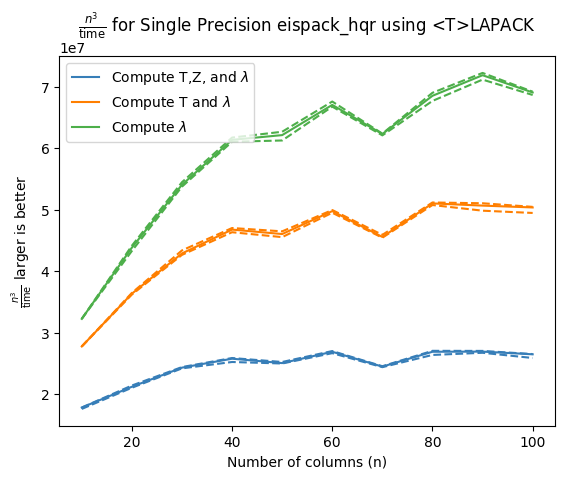

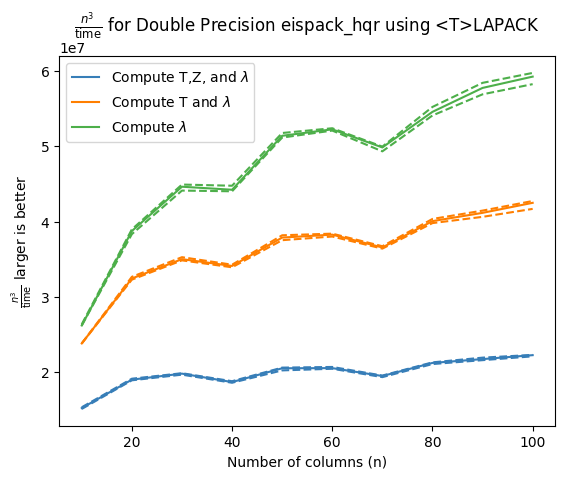

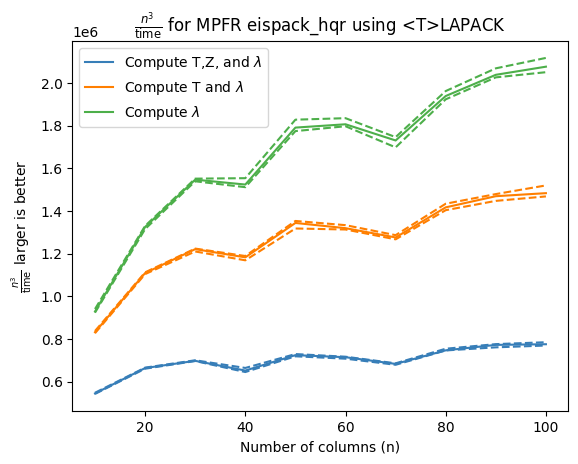

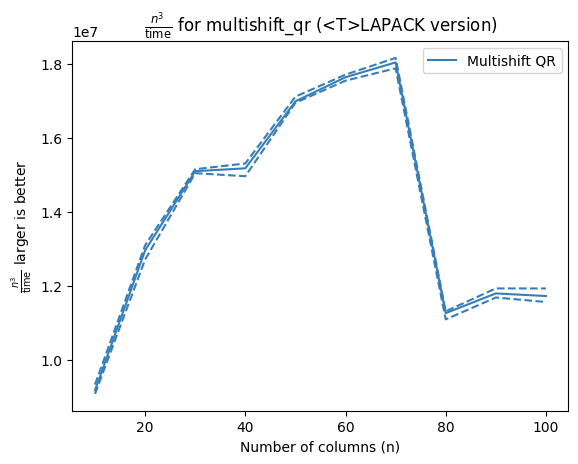

In [3]:
file = open("experiments.txt")
lines = file.readlines()
nVec = []
optTime = []
refTime = []
tTime = []
eTime = []
# Since we are comparing iterative methods, it doesn't make sence to discuss performance, but
# we still look at the inverse of time scaled down by n^3 to attempt to linearize the data 
# making it easier to visually inspect

timeSingleVecs = [[], [], []]
timeDoubleVecs = [[], [], []]
timeMPFRVecs = [[], [], []]
timeMShift = []
timeMShiftVecs = [timeMShift]
timeVecs = [timeSingleVecs, timeDoubleVecs, timeMPFRVecs, timeMShiftVecs]
labelVec = ["Compute T,Z, and $\\lambda$", "Compute T and $\\lambda$", "Compute $\\lambda$"]

for j in range(len(lines)):
    line = lines[j]
    if (line[0] == 'R' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    if (line[0] == 'S'):
        index2 = 0
        continue
    if (line[0] == 'D'):
        index2 = 1
        continue
    if (line[0:2] == 'MP'):
        index2 = 2
        continue
    if (line[0:2] == "Mu"):
        index2 = 3
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    if (source == 'TQE' or source == 'M'):
        index = 0
    elif (source == 'TE'):
        index = 1
    elif (source == 'E'):
        index = 2
    try:
        value = nVec[-1]**3 / float(lineVec[1])
    except:
        print(lineVec)
    if (value == 0):
        continue
    if (len(nVec) > len(timeVecs[index2][index])):
        timeVecs[index2][index].append([value])
    else:
        timeVecs[index2][index][-1].append(value)
    time = value
index = nVec.index(100)+1
createGraphs2(nVec[0:index], timeSingleVecs, labelVec, "$\\frac{n^3}{\\text{time}}$ for Single Precision eispack_hqr using <T>LAPACK", "Number of columns (n)", "$\\frac{n^3}{\\text{time}}$ larger is better", "eispackHqrTlapackPerfSingle.pdf")
createGraphs2(nVec[0:index], timeDoubleVecs, labelVec, "$\\frac{n^3}{\\text{time}}$ for Double Precision eispack_hqr using <T>LAPACK", "Number of columns (n)", "$\\frac{n^3}{\\text{time}}$ larger is better", "eispackHqrTlapackPerfDouble.pdf")
createGraphs2(nVec[0:index], timeMPFRVecs, labelVec, "$\\frac{n^3}{\\text{time}}$ for MPFR eispack_hqr using <T>LAPACK", "Number of columns (n)", "$\\frac{n^3}{\\text{time}}$ larger is better", "eispackHqrTlapackPerfMPFR.pdf")
createGraphs2(nVec[0:index], timeMShiftVecs, ["Multishift QR"], "$\\frac{n^3}{\\text{time}}$ for multishift_qr (<T>LAPACK version)", "Number of columns (n)", "$\\frac{n^3}{\\text{time}}$ larger is better", "multiShiftQRPerfDouble.pdf")

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


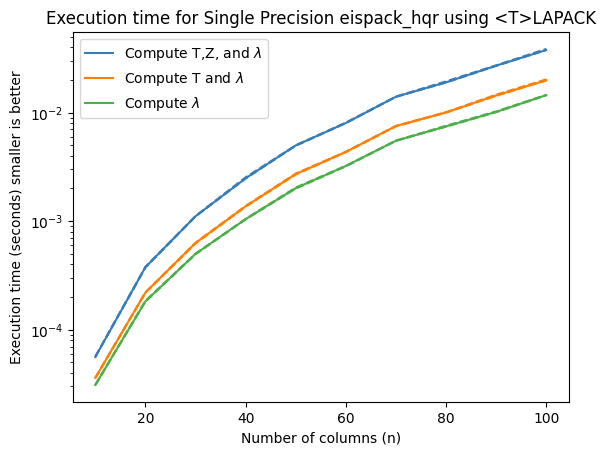

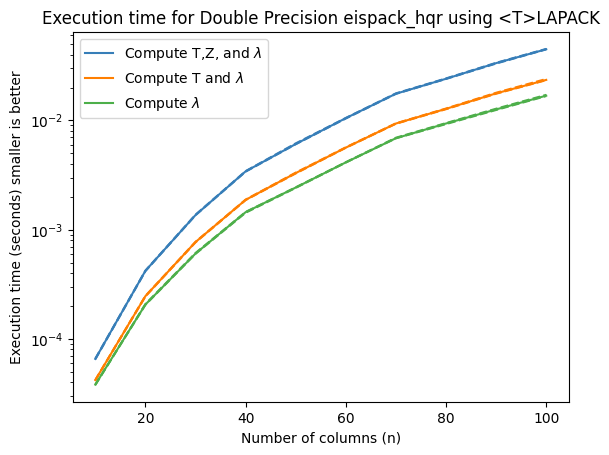

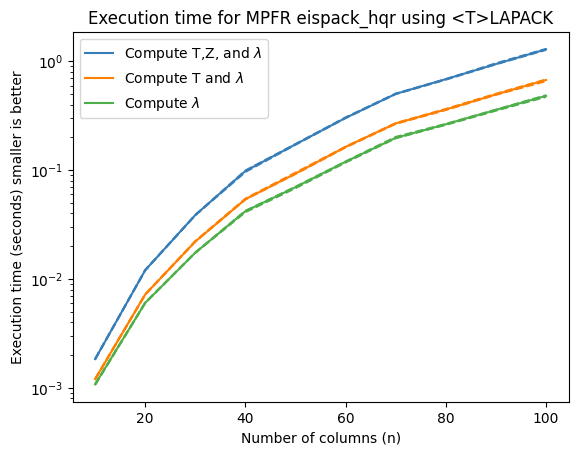

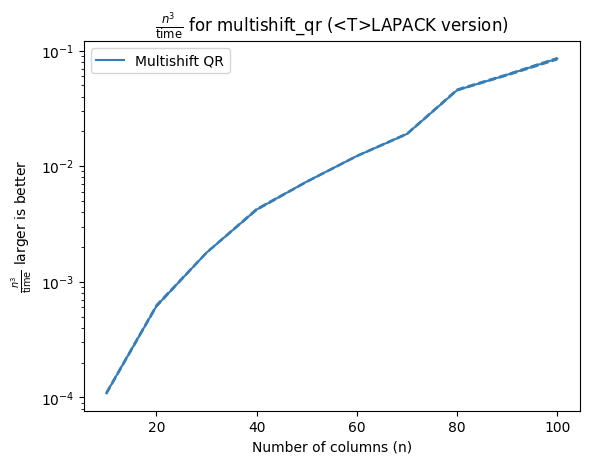

In [4]:
file = open("experiments.txt")
lines = file.readlines()
nVec = []
optTime = []
refTime = []
tTime = []
eTime = []

timeSingleVecs2 = [[], [], []]
timeDoubleVecs2 = [[], [], []]
timeMPFRVecs2 = [[], [], []]
timeMShift2 = []
timeMShiftVecs2 = [timeMShift2]
timeVecs = [timeSingleVecs2, timeDoubleVecs2, timeMPFRVecs2, timeMShiftVecs2]
labelVec = ["Compute T,Z, and $\\lambda$", "Compute T and $\\lambda$", "Compute $\\lambda$"]

for j in range(len(lines)):
    line = lines[j]
    if (line[0] == 'R' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    if (line[0] == 'S'):
        index2 = 0
        continue
    if (line[0] == 'D'):
        index2 = 1
        continue
    if (line[0:2] == 'MP'):
        index2 = 2
        continue
    if (line[0:2] == "Mu"):
        index2 = 3
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    if (source == 'TQE' or source == 'M'):
        index = 0
    elif (source == 'TE'):
        index = 1
    elif (source == 'E'):
        index = 2
    value = float(lineVec[1])
    if (value == 0):
        continue
    if (len(nVec) > len(timeVecs[index2][index])):
        timeVecs[index2][index].append([value])
    else:
        timeVecs[index2][index][-1].append(value)
    time = value
index = nVec.index(100)+1
createGraphs3(nVec[0:index], timeSingleVecs2, labelVec, "Execution time for Single Precision eispack_hqr using <T>LAPACK", "Number of columns (n)", "Execution time (seconds) smaller is better", "eispackHqrTlapackTimeSingle.pdf")
createGraphs3(nVec[0:index], timeDoubleVecs2, labelVec, "Execution time for Double Precision eispack_hqr using <T>LAPACK", "Number of columns (n)", "Execution time (seconds) smaller is better", "eispackHqrTlapackTimeDouble.pdf")
createGraphs3(nVec[0:index], timeMPFRVecs2, labelVec, "Execution time for MPFR eispack_hqr using <T>LAPACK", "Number of columns (n)", "Execution time (seconds) smaller is better", "eispackHqrTlapackTimeMPFR.pdf")
createGraphs3(nVec[0:index], timeMShiftVecs2, ["Multishift QR"], "$\\frac{n^3}{\\text{time}}$ for multishift_qr (<T>LAPACK version)", "Number of columns (n)", "$\\frac{n^3}{\\text{time}}$ larger is better", "multiShiftQRPerfDouble.pdf")

/tmp/ipykernel_28816/303359924.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


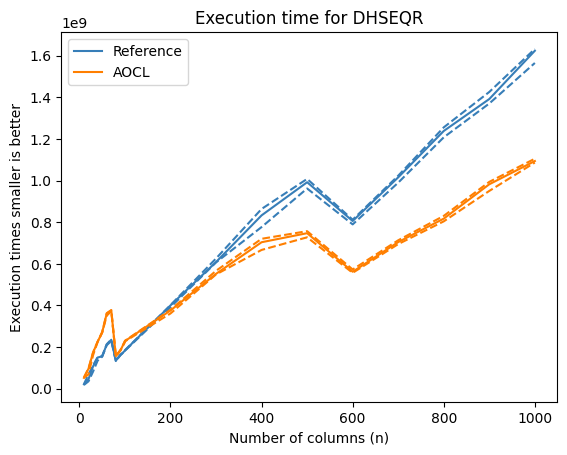

In [5]:
file = open("hseqr.txt")
lines = file.readlines()
nVec = []
optTime = []
refTime = []
tTime = []
eTime = []
# Since we are comparing iterative methods, it doesn't make sence to discuss performance, but
# we still look at the inverse of time scaled down by n^3 to attempt to linearize the data 
# making it easier to visually inspect

timeLAPACKVecs = [refTime, optTime]
labelLAPACKVec = ["Reference", "AOCL"]

for j in range(len(lines)):
    line = lines[j]
    if (line[0:2] == 'Ru' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    if (source == 'Ref'):
        index = 0
    elif (source == 'Opt'):
        index = 1
    value = nVec[-1]**3 / float(lineVec[1])
    if (value == 0):
        continue
    if (len(nVec) > len(timeLAPACKVecs[index])):
        timeLAPACKVecs[index].append([value])
    else:
        timeLAPACKVecs[index][-1].append(value)
    time = value
createGraphs2(nVec, timeLAPACKVecs, labelLAPACKVec, "Execution time for DHSEQR", "Number of columns (n)", "Execution times smaller is better", "dhseqrPerf.pdf")#, "eispackHqrTlapackPerfDouble.pdf")

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


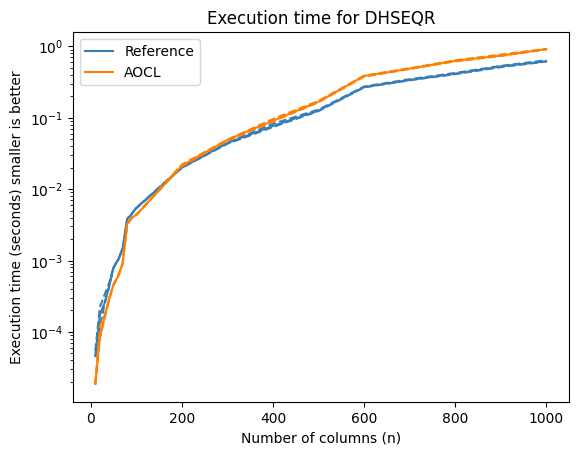

In [6]:
file = open("hseqr.txt")
lines = file.readlines()
nVec = []
optTime2 = []
refTime2 = []
tTime = []
eTime = []
# Since we are comparing iterative methods, it doesn't make sence to discuss performance, but
# we still look at the inverse of time scaled down by n^3 to attempt to linearize the data 
# making it easier to visually inspect

timeLAPACKVecs = [refTime2, optTime2]
labelLAPACKVec = ["Reference", "AOCL"]

for j in range(len(lines)):
    line = lines[j]
    if (line[0:2] == 'Ru' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    if (source == 'Ref'):
        index = 0
    elif (source == 'Opt'):
        index = 1
    value = float(lineVec[1])
    if (value == 0):
        continue
    if (len(nVec) > len(timeLAPACKVecs[index])):
        timeLAPACKVecs[index].append([value])
    else:
        timeLAPACKVecs[index][-1].append(value)
    time = value
createGraphs3(nVec, timeLAPACKVecs, labelLAPACKVec, "Execution time for DHSEQR", "Number of columns (n)", "Execution time (seconds) smaller is better", "dhseqrTime.pdf")#, "eispackHqrTlapackPerfDouble.pdf")

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


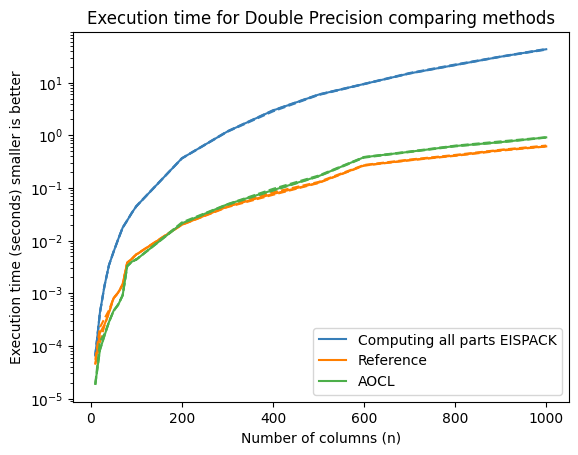

In [7]:
combineYVecs = [timeDoubleVecs2[0], refTime2, optTime2]
combineLabel = ["Computing all parts EISPACK", labelLAPACKVec[0], labelLAPACKVec[1]]
createGraphs3(nVec, combineYVecs, combineLabel, "Execution time for Double Precision comparing methods", "Number of columns (n)", "Execution time (seconds) smaller is better", "combinedTimeResults.pdf")

5.1975250244e-05
0.00013494491577
0.00035095214844
0.00098013877869
0.0017409324646
0.0033040046692
0.004077911377
0.0063519477844
0.0085208415985
0.011180877686
0.01104092598
0.083300113678
0.28183794022
0.66501307487
1.1602311134
2.456964016
3.4136669636
5.0098099709
6.7858119011
10.340831041


/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


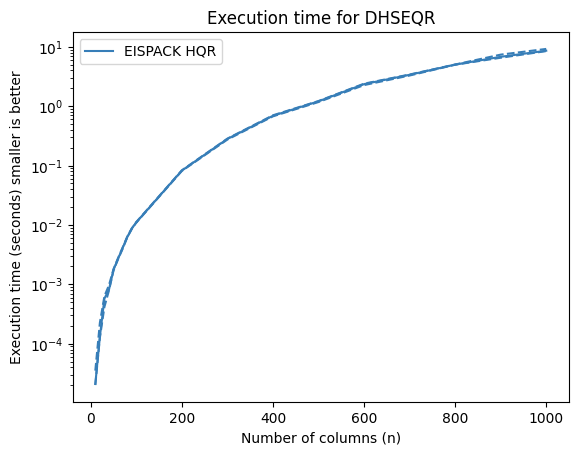

In [8]:
file = open("hqrTimes.txt")
lines = file.readlines()
nVec = []
times = []
timesVec = [times]

for j in range(len(lines)):
    line = lines[j]
    if (line[0:2] == 'Ru' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    value = float(lineVec[1])
    if (value == 0):
        continue
    if (len(nVec) > len(timesVec[0])):
        timesVec[0].append([value])
    else:
        timesVec[0][-1].append(value)
for j in range(len(nVec)):
    print(times[j][0])
createGraphs3(nVec, timesVec, ["EISPACK HQR"], "Execution time for DHSEQR", "Number of columns (n)", "Execution time (seconds) smaller is better")

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


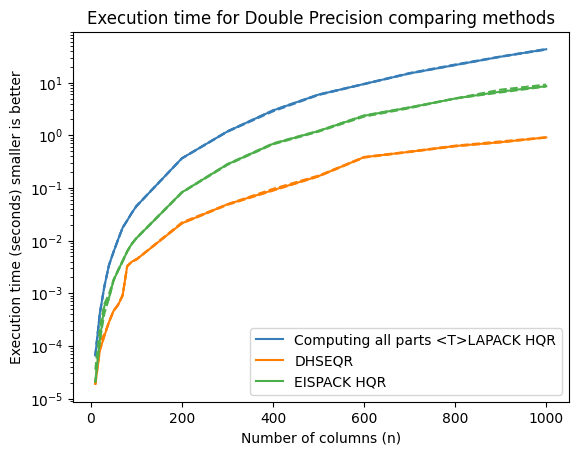

In [9]:
combineYVecs = [timeDoubleVecs2[0], optTime2, times]
combineLabel = ["Computing all parts <T>LAPACK HQR", "DHSEQR", "EISPACK HQR"]
createGraphs3(nVec, combineYVecs, combineLabel, "Execution time for Double Precision comparing methods", "Number of columns (n)", "Execution time (seconds) smaller is better", "combinedTimeResultsAll.pdf")
nVec2 = nVec

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


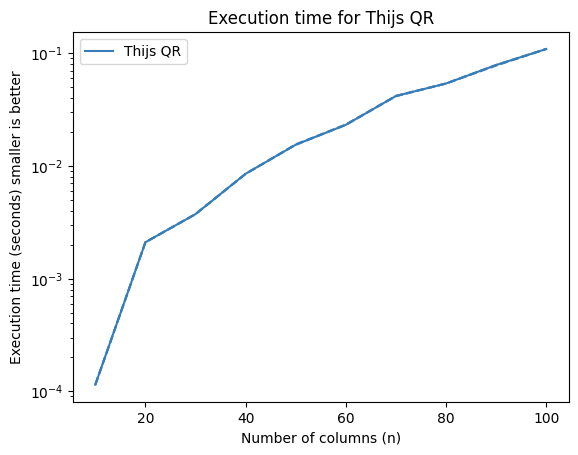

In [10]:
file = open("multiShift.txt")
lines = file.readlines()
nVec = []
times1 = []
timesVec = [times1]

for j in range(len(lines)):
    line = lines[j]
    if (line[0:2] == 'Ru' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    lineVec = line.split(":")
    value = float(lineVec[0])
    if (value == 0):
        continue
    if (len(nVec) > len(timesVec[0])):
        timesVec[0].append([value])
    else:
        timesVec[0][-1].append(value)
createGraphs3(nVec, timesVec, ["Thijs QR"], "Execution time for Thijs QR", "Number of columns (n)", "Execution time (seconds) smaller is better")

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


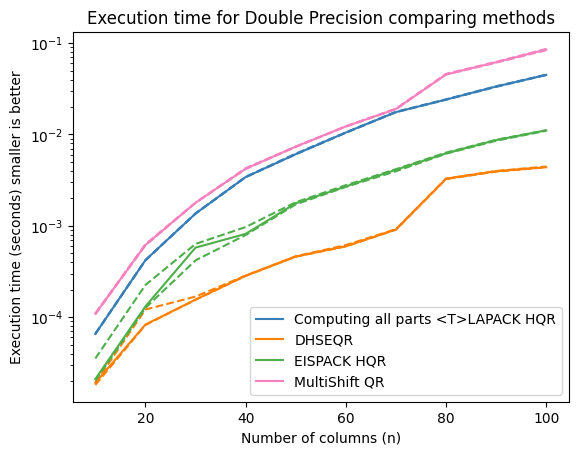

In [12]:
combineYVecs = [timeDoubleVecs2[0][0:index], optTime2[0:index], times[0:index], timeMShift2[0:index]]
combineLabel = ["Computing all parts <T>LAPACK HQR", "DHSEQR", "EISPACK HQR", "MultiShift QR"]
createGraphs3(nVec, combineYVecs, combineLabel, "Execution time for Double Precision comparing methods", "Number of columns (n)", "Execution time (seconds) smaller is better", "combinedTimeResultsAllSmall.pdf")

/tmp/ipykernel_28816/303359924.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


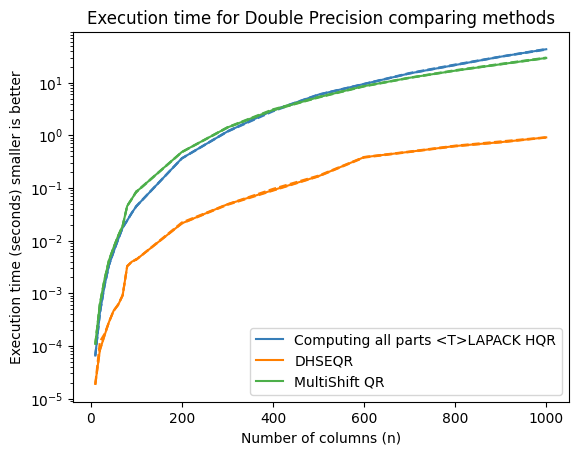

In [14]:
combineYVecs = [timeDoubleVecs2[0], optTime2, timeMShift2]
combineLabel = ["Computing all parts <T>LAPACK HQR", "DHSEQR", "MultiShift QR"]
createGraphs3(nVec2, combineYVecs, combineLabel, "Execution time for Double Precision comparing methods", "Number of columns (n)", "Execution time (seconds) smaller is better", "combinedTimeResultsAllLarger.pdf")